 # COURSERA CAPSTONE PROJECT 
 ## IBM Data Science Capstone Final Project

#### I am creating clusters to find the appropriate location to open a New North Indian Restaurant in the neighborhood of Toronto, Canada.

In [95]:
# Download beautifulsoup4 library for webscraping, if not installed
# !conda install beautifulsoup4

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



print('Libraries imported.')

Libraries imported.


### Scrapping neighborhoods in Canada


In [6]:
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
!wget $url -q -O List_of_postal_codes_of_Canada.html
print("Download complete")

Download complete


In [7]:
df = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Drop the the rows on which the Borough is empty

In [8]:
#Drop the the rows on which the Borough is empty
df.dropna(subset=['Borough'], inplace=True)

In [9]:
#Check Neighborhood is empty but Borough exists
n_empty_neighborhood = df[df['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 1


In [10]:
df[df['Neighbourhood'].isna()]


,Postcode,Borough,Neighbourhood
9,M9A,Queen's Park,NaN


In [11]:
#Replace empty Neighborhood with Borough name and check again
df['Neighbourhood'].fillna(df['Borough'], inplace=True)
n_empty_neighborhood = df[df['Neighbourhood'].isna()].shape[0]
print('Number of rows on which Neighborhood column is empty: {}'.format(n_empty_neighborhood))

Number of rows on which Neighborhood column is empty: 0


In [14]:
#Group by Postcode / Borough
df_postcodes = df.groupby(['Postcode','Borough']).Neighbourhood.agg([('Neighbourhood', ', '.join)])
df_postcodes.reset_index(inplace=True)
df_postcodes.head(5)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [15]:
print('The shape of the dataset is:',df_postcodes.shape)

The shape of the dataset is: (103, 3)


## Export to .CSV

In [17]:
df_postcodes.to_csv('Canada_Postcodes.csv')

In [18]:
#Read CSV file from link and load into dataframe
url_csv = 'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv(url_csv)
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
df_neighborhoods = pd.read_csv('Canada_Postcodes.csv',index_col=[0])
df_neighborhoods.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


##### Make sure both dataframes have the same 

In [21]:
df_coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_neighborhoods.rename(columns={'Postcode': 'PostalCode'}, inplace=True)

##### Merge both datasets

In [22]:
df_neighborhoods_coordinates = pd.merge(df_neighborhoods, df_coordinates, on='PostalCode')
df_neighborhoods_coordinates.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [23]:
df_neighborhoods_coordinates[(df_neighborhoods_coordinates['PostalCode']=='M3H') |
                             (df_neighborhoods_coordinates['PostalCode']=='M6C') ]

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
28,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259
73,M6C,York,Humewood-Cedarvale,43.693781,-79.428191


In [24]:
df_neighborhoods_coordinates.to_csv('Toronto_Postcodes.csv')


In [29]:
# Read .csv file from above
df = pd.read_csv('Toronto_Postcodes.csv', index_col=0)
df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [30]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [31]:
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)


In [32]:
#count Bourough and Neighborhood
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           11
Mississauga          1
North York          24
Queen's Park         1
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [33]:
df_toronto = df[df['Borough'].str.contains('Toronto')]
df_toronto.reset_index(inplace=True)
df_toronto.drop('index', axis=1, inplace=True)
df_toronto.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [34]:
boroughs = df_toronto['Borough'].unique().tolist()

In [35]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66713498717948, -79.38987324871795


In [36]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [38]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [39]:
print(df_toronto.groupby('Borough').count()['Neighborhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


## Getting Data of Venues using Foursquare API

In [41]:
CLIENT_ID = '14E3OWPRGPLPJQV4CBPBQKDHBCITKYLFWPDGA1WAAJUJWORF' 
CLIENT_SECRET = 'YYU2XZJSGYXYLXP2HHERT5AJMDQNQZYAJE2I5E3PYOE1HJIZ' 
VERSION = '20191001' 
LIMIT = 100 
radius = 500

In [47]:
address = 'TORONTO'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [48]:
search_query = 'North INDIAN Restaurant'
radius = 100
print(search_query + ' .... OK!')

North INDIAN Restaurant .... OK!


In [49]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=14E3OWPRGPLPJQV4CBPBQKDHBCITKYLFWPDGA1WAAJUJWORF&client_secret=YYU2XZJSGYXYLXP2HHERT5AJMDQNQZYAJE2I5E3PYOE1HJIZ&ll=43.653963,-79.387207&v=20191001&query=North INDIAN Restaurant&radius=100&limit=100'

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e257aaab9a389001bad860c'},
 'response': {'venues': []}}

In [63]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [64]:
#Check size of resulting dataframe
toronto_venues.shape

(1705, 7)

In [67]:
toronto_venues


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
3,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
7,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
9,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


## Number of venues per neighborhood

In [68]:
toronto_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",24,24,24,24,24,24
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",18,18,18,18,18,18
"Cabbagetown, St. James Town",47,47,47,47,47,47
Central Bay Street,82,82,82,82,82,82
"Chinatown, Grange Park, Kensington Market",87,87,87,87,87,87
Christie,17,17,17,17,17,17


In [69]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 230 uniques categories.



#### print out the list of categories


In [70]:
toronto_venues['Venue Category'].unique()[:150]


array(['Trail', 'Health Food Store', 'Other Great Outdoors', 'Pub',
       'Neighborhood', 'Greek Restaurant', 'Cosmetics Shop',
       'Italian Restaurant', 'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Pizza Place', 'Restaurant',
       'Bookstore', 'Dessert Shop', 'Bubble Tea Shop', 'Juice Bar', 'Spa',
       'Diner', 'Furniture / Home Store', 'Grocery Store',
       'Caribbean Restaurant', 'Indian Restaurant', 'Coffee Shop',
       'Bakery', 'Sports Bar', 'Lounge', 'American Restaurant',
       'Liquor Store', 'Gym', 'Fish & Chips Shop', 'Burger Joint',
       'Sushi Restaurant', 'Park', 'Pet Store', 'Steakhouse',
       'Burrito Place', 'Movie Theater', 'Fast Food Restaurant',
       'Sandwich Place', 'Food & Drink Shop', 'Fish Market', 'Café',
       'Gay Bar', 'Seafood Restaurant', 'Cheese Shop',
       'Middle Eastern Restaurant', 'Comfort Food Restaurant',
       'Thai Restaurant', 'Stationery Store', 'Wine Bar',
       'Coworking Space', 'Bar'

## Check if the results contain "Indian Restaurants


In [71]:
"Indian Restaurant" in toronto_venues['Venue Category'].unique()

True

## Analysing Each Neighborhood


In [72]:
# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]



In [73]:
print(to_onehot.shape)
to_onehot.head()

(1705, 231)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped



(39, 231)


,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.030000,0.010000,0.000000,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.070000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.00000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [75]:
len(to_grouped[to_grouped["Indian Restaurant"] > 0])


8

# Create a new dataframe to find Indian Restaurants only



In [76]:
to_indian = to_grouped[["Neighborhoods","Indian Restaurant"]]

In [78]:
to_indian.head()

,Neighborhoods,Indian Restaurant
0,"Adelaide, King, Richmond",0.01
1,Berczy Park,0.00
2,"Brockton, Exhibition Place, Parkdale Village",0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.00
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.00


# Clustering

### Finding best value for K, so that we can use that value for finding appropriate location for restaurant


In [81]:
mms = MinMaxScaler()
to_clustering = to_indian.drop(["Neighborhoods"], 1)
mms.fit(to_clustering)
data_transformed = mms.transform(to_clustering)

In [85]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/c

### Visualising the values of k


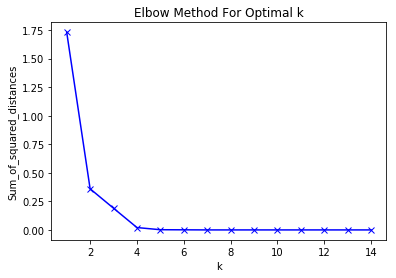

In [86]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Clustering Neighborhoos


##### set optimal number of clusters


In [87]:
toclusters = 5

In [88]:
# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=0).fit(to_clustering)

# check cluster labels generated for each row in the dataframe
km.labels_[0:10]

array([3, 0, 0, 0, 0, 2, 0, 0, 0, 6], dtype=int32)

### create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [89]:
to_merged = to_indian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [91]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)


In [92]:
to_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,"Adelaide, King, Richmond",0.01,0
1,Berczy Park,0.00,1
2,"Brockton, Exhibition Place, Parkdale Village",0.00,1
3,Business Reply Mail Processing Centre 969 Eastern,0.00,1
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.00,1


In [93]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(df_toronto.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(39, 7)


,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide, King, Richmond",0.01,0,M5H,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,0.00,1,M5E,Downtown Toronto,43.644771,-79.373306
2,"Brockton, Exhibition Place, Parkdale Village",0.00,1,M6K,West Toronto,43.636847,-79.428191
3,Business Reply Mail Processing Centre 969 Eastern,0.00,1,M7Y,East Toronto,43.662744,-79.321558
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.00,1,M5V,Downtown Toronto,43.628947,-79.394420


## Sort the results by Cluster Labels


In [94]:
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(39, 7)


,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide, King, Richmond",0.010000,0,M5H,Downtown Toronto,43.650571,-79.384568
20,"Harbourfront East, Toronto Islands, Union Station",0.010000,0,M5J,Downtown Toronto,43.640816,-79.381752
32,St. James Town,0.010000,0,M5C,Downtown Toronto,43.651494,-79.375418
9,Church and Wellesley,0.011628,0,M4Y,Downtown Toronto,43.665860,-79.383160
34,Studio District,0.000000,1,M4M,East Toronto,43.659526,-79.340923
31,"Ryerson, Garden District",0.000000,1,M5B,Downtown Toronto,43.657162,-79.378937
30,"Runnymede, Swansea",0.000000,1,M6S,West Toronto,43.651571,-79.484450
29,Roselawn,0.000000,1,M5N,Central Toronto,43.711695,-79.416936
28,Rosedale,0.000000,1,M4W,Downtown Toronto,43.679563,-79.377529
36,The Beaches,0.000000,1,M4E,East Toronto,43.676357,-79.293031


## Visualization

In [96]:
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=13)


# set color scheme for the clusters
x = np.arange(toclusters)
ys = [i+x+(i*x)**2 for i in range(toclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    
       



In [97]:
#display Map
display(map_clusters)

### Analysis the Clusters


In [98]:
#Cluster 0
to_merged.loc[to_merged['Cluster Labels'] == 0]
#print(to_merged.loc[to_merged['Cluster Labels'] == 0].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
0,"Adelaide, King, Richmond",0.010000,0,M5H,Downtown Toronto,43.650571,-79.384568
20,"Harbourfront East, Toronto Islands, Union Station",0.010000,0,M5J,Downtown Toronto,43.640816,-79.381752
32,St. James Town,0.010000,0,M5C,Downtown Toronto,43.651494,-79.375418
9,Church and Wellesley,0.011628,0,M4Y,Downtown Toronto,43.665860,-79.383160



## Cluster 1


In [99]:
to_merged.loc[to_merged['Cluster Labels'] == 1]
#print(to_merged.loc[to_merged['Cluster Labels'] == 1].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
34,Studio District,0.0,1,M4M,East Toronto,43.659526,-79.340923
31,"Ryerson, Garden District",0.0,1,M5B,Downtown Toronto,43.657162,-79.378937
30,"Runnymede, Swansea",0.0,1,M6S,West Toronto,43.651571,-79.484450
29,Roselawn,0.0,1,M5N,Central Toronto,43.711695,-79.416936
28,Rosedale,0.0,1,M4W,Downtown Toronto,43.679563,-79.377529
36,The Beaches,0.0,1,M4E,East Toronto,43.676357,-79.293031
27,Queen's Park,0.0,1,M7A,Downtown Toronto,43.662301,-79.389494
26,"Parkdale, Roncesvalles",0.0,1,M6R,West Toronto,43.648960,-79.456325
25,North Toronto West,0.0,1,M4R,Central Toronto,43.715383,-79.405678
24,"Moore Park, Summerhill East",0.0,1,M4T,Central Toronto,43.689574,-79.383160


## Cluster 2


In [101]:
to_merged.loc[to_merged['Cluster Labels'] == 2]
#print(to_merged.loc[to_merged['Cluster Labels'] == 2].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
35,"The Annex, North Midtown, Yorkville",0.047619,2,M5R,Central Toronto,43.67271,-79.405678


## Cluster 3


In [102]:
to_merged.loc[to_merged['Cluster Labels'] == 3]
#print(to_merged.loc[to_merged['Cluster Labels'] == 3].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
5,"Cabbagetown, St. James Town",0.021277,3,M4X,Downtown Toronto,43.667967,-79.367675
38,"The Danforth West, Riverdale",0.023256,3,M4K,East Toronto,43.679557,-79.352188


## Cluster 4

In [103]:
to_merged.loc[to_merged['Cluster Labels'] == 4]
#print(to_merged.loc[to_merged['Cluster Labels'] == 4].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude
11,Davisville,0.030303,4,M4S,Central Toronto,43.704324,-79.38879


## Cluster 5

In [104]:
to_merged.loc[to_merged['Cluster Labels'] == 5]
#print(to_merged.loc[to_merged['Cluster Labels'] == 5].shape)

,Neighborhood,Indian Restaurant,Cluster Labels,PostalCode,Borough,Latitude,Longitude


In [105]:
x1 = to_merged.loc[to_merged['Cluster Labels'] == 0]['Indian Restaurant'].mean()
x2 = to_merged.loc[to_merged['Cluster Labels'] == 1]['Indian Restaurant'].mean()
x3 = to_merged.loc[to_merged['Cluster Labels'] == 2]['Indian Restaurant'].mean()
x4 = to_merged.loc[to_merged['Cluster Labels'] == 3]['Indian Restaurant'].mean()
x5 = to_merged.loc[to_merged['Cluster Labels'] == 4]['Indian Restaurant'].mean()


In [106]:
data = [['Cluster 0', x1],['Cluster 1',x2],['Cluster 2', x3],['Cluster 3', x4],['Cluster 3', x5]]


In [107]:
df = pd.DataFrame(data,columns =['Clusters','Indian restaurant(Mean)'])
df

,Clusters,Indian restaurant(Mean)
0,Cluster 0,0.010407
1,Cluster 1,0.000000
2,Cluster 2,0.047619
3,Cluster 3,0.022266
4,Cluster 3,0.030303


# Visualising the Data


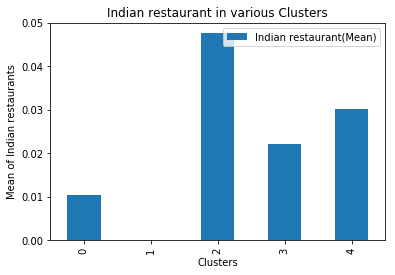

In [111]:
df.plot.bar()
plt.title('Indian restaurant in various Clusters')
plt.xlabel('Clusters')
plt.ylabel('Mean of Indian restaurants')
plt.show()

In [113]:
search_query = 'North Indian Restaurant'
radius = 100
print(search_query + ' .... OK!')

North Indian Restaurant .... OK!


In [119]:
pd.set_option('max_colwidth', 800)

In [114]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=14E3OWPRGPLPJQV4CBPBQKDHBCITKYLFWPDGA1WAAJUJWORF&client_secret=YYU2XZJSGYXYLXP2HHERT5AJMDQNQZYAJE2I5E3PYOE1HJIZ&ll=43.653963,-79.387207&v=20191001&query=North Indian Restaurant&radius=100&limit=100'

In [115]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2581ae3907e70022dd5fb9'},
 'response': {'venues': []}}

In [116]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

""


In [117]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array

Neighbourhood = [] # Initializing the Neighbourhood array

In [122]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel



# display map
venues_map

# Conclusion


### Most of Indian restaurants are in Cluster 2 which is around The Annex, North Midtown, Yorkville. Lowest (close to zero) in Cluster 0 and Cluster 1  areas which are Downtown Toronto, east, west, central Toronto areas. Also, there are good opportunities to open near Downtown,east, west Toronto as the competition seems to be low.

#### Looking at nearby venues, it seems Cluster 0 and cluster 1 might be a good location as there are not a lot of North Indian restaurants in these areas. Therefore, this project recommends the entrepreneur to open a reliable North Indian restaurant in these locations with little to no competition.

